# Load kml points and export to GeoModeller

Load point sets (polylines in GoogleEarth), calculate planes (if required), export to csv file for use with GeoModeller.


In [1]:
# basic imports
import matplotlib.pyplot as plt
import numpy as np
import sys

from importlib import reload

In [2]:
sys.path.append('..')
from googlepicks import kml_to_plane
reload(kml_to_plane)

<module 'googlepicks.kml_to_plane' from '..\\googlepicks\\kml_to_plane.py'>

## Load kml file

</p>

<div class="alert alert-success">
  <strong>Your task:</strong> Include here the path and name to your kml file:
</div>

In [3]:
filename = "../data/dip4.kml"
k1 = kml_to_plane.KmlPoints(filename = filename, debug=True)

read kml
1 point sets added


## Load Geotiff to get z-value

We here have to include the GeoTiff image that is covering our area:

In [4]:
k1.add_geotiff("../data/dome_sub_sub_utm.tif")

Note: for efficiency reasons, add the most important geotiff first!


And if we have the correct GeoTiff, then we can determine the appripriate z-values: 

In [5]:
k1.determine_z_values()

## Convert geographic coordinats to UTM and fit plane

As a next step, we fit planes to all point sets:

In [6]:
k1.fit_plane_to_all_sets()

Convert Lat/Long to UTM


In [7]:
k1.point_sets

[Point set with 5 points; utm; Centroid: at (615165.01, 2477880.40, 430.00); Orientation: (295/28)]

## Create Stereonet plot for this plane

And finally, we can create a stereonet plot with including all fitted planes:

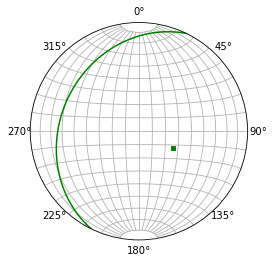

In [8]:
%matplotlib inline
k1.stereonet()
# plt.savefig("stereonet_all.pdf")
plt.show()

## Export for GeoModeller

### Export orientation measurements

First step: export orientation values to Geomodeller format

In [9]:
k1.export_for_geomodeller(filename = 'jebel_madar_ori.csv', formname='Natih', data_type = 'ori')

### Export plane picks

In [14]:
# take all files in planes directory:
planes_dir = "/Users/flow/sciebo/Karten_und_Profile/planes"
import os

for plane_file in os.listdir(planes_dir):
    filename = os.path.join(planes_dir, plane_file)
    k1 = kml_to_plane.KmlPoints(filename = filename, debug=False)
    k1.add_geotiff("../data/dome_sub_sub_utm.tif")
    k1.determine_z_values()
    k1.latlong_to_utm()
    # extract formation name and construct new filename
    basename = os.path.splitext(plane_file)[0]
    k1.export_for_geomodeller(filename = basename + '_top.csv', formname=basename, data_type = 'planes')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/flow/sciebo/Karten_und_Profile/planes'